<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regressino_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression inputs and outputs

Inputs -> Machine learning algorithm -> Outputs

## What is Regression problem ?

If you are planning to predict a house price with available variables like number of rooms , bathrooms, squarefoot etc, then you are dealing with a regression problem.

## How are you going to solve it ?

Understand inputs (independent variable) and outputs (dependent variables).

Inputs features can be number of rooms, bathrooms etc. Try creating a data using one-hot encoding (which is learnt earlier).  Looks if someone has already created a machine learning algorithm (for example supervised learning algorithm) for your problem online. If you cant find you can implement by yourself. Finally output can be a price predicted of the house from the inputs you shared through iput.

Here numerical encoding of indepedent variables in the form of tensor.

# Anatomy of Neural Networks (NN)

Input layers -> Hidde layers -> Output layers

With hidden layers, the neural network learns the pattern.

## What does the NN regression algorithm look like ?

Hyper Parameters we need to consdier are


1. Input layer shape
2. Hidden layer(s)
3. Neurons per hidden layer
4. Output layer shape
5. Hidden activation
6. Output activation
7. Loss function
8. Optimizer


## Here in this Housing problem
1. Input layers are number of bathrooms, rooms etc.
2. Hidden layers: Problem specific 1 to unlimited
3. Neurons per hidden layer: generally 0 to 100
4. Output layer shape : same shape as desired prediction shape (eg. 1 for house price)
5. Hidden activation : Usually ReLU (Rectified Linear unit).
6. Output activation : None, ReLu , logistic/tanh
7. Loss function: MSE (Mean square error) or MAE  (Mean absolute error) / Huber (Combination of MAE/MSE) if outliers
8. Optimizer : SGD stochastic gradient descent , Adam






# Introduction to Regressions with NN in tensor flow.

There are many definitions for a regression problem but in our case, we are going to simplify it. Predictig numerical variabel absed on some other combination of variabels even sorter predicting a number.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


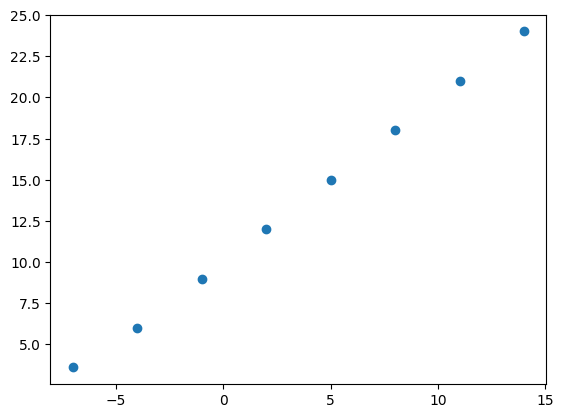

In [2]:
#Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.6, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#Visualize it
plt.scatter(X, y)

Lets try to work pattern between X and y

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([False,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [5]:
#Create Demo tensor for our housing price predictio problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
print(house_info)

house_price = tf.constant([939700])
print(house_price)

house_info.shape, house_price.shape

tf.Tensor([b'bedroom' b'bathroom' b'garage'], shape=(3,), dtype=string)
tf.Tensor([939700], shape=(1,), dtype=int32)


(TensorShape([3]), TensorShape([1]))

In [6]:
X[0], y[0]

(-7.0, 3.6)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.6)

##Turnig  Numpy Arrays into tensors

In [11]:

X = tf.cast(tf.constant(X),  dtype=tf.float32)
y = tf.cast(tf.constant(y),  dtype=tf.float32)
X = tf.reshape(X, shape=(8,1))
y = tf.reshape(y, shape=(8,1))
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

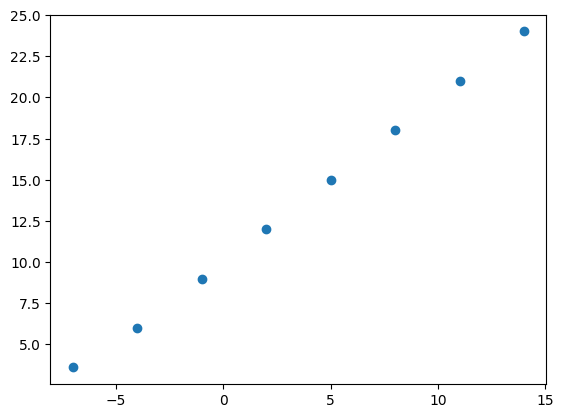

In [13]:
plt.scatter(X, y)

##Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our models how to improve the patterns its learning) and evalutation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find the patterns between x and y (Features and labels)

In [14]:
#Set random seed
tf.random.set_seed(42)

print(X)
#1. Create a model using the Sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mean absolute error : Comparision of prediction vs observed
              optimizer = tf.keras.optimizers.SGD(), #Stochastic radiant descent
              metrics = ["mae"])

#3.Fit the model
model.fit(X, y, epochs=5)


tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float32)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.6881 - mae: 11.6881
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 11.5556 - mae: 11.5556
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 11.4231 - mae: 11.4231
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 11.2906 - mae: 11.2906
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.1581 - mae: 11.1581


In [15]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [16]:
#Try predicting the model
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[12.189939],
       [ 0.05    ]], dtype=float32)

In [17]:
#added prediction + mae
y_predict = y_predict + 10.7413
y_predict

array([[22.931238],
       [10.7913  ]], dtype=float32)

## Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization fucntion.
3. **Fitting a model** -Here we might fit model for more **epochs** (leave it training for long time)
  

In [18]:
#Lets rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.1542 - mae: 12.1542
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 11.2541 - mae: 11.2541
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.4623 - mae: 10.4623
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.7768 - mae: 9.7768
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 9.0713 - mae: 9.0713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.3420 - mae: 8.3420
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.5997 - mae: 7.5997
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.8410 - mae: 6.8410
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.0558 - mae: 6.0558
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.2377 - mae: 5.2377
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.3854 - mae: 4.3854
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.8166 - mae: 3.8166
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50

In [19]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[26.574818],
       [10.275449]], dtype=float32)

We were expecting value of y predicted is 27. Its almost near with an mae 0.2162 and loss : 0.2163. Lets try increasing layer and check

In [20]:
#Can we do better lets see
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.6532 - mae: 13.6532
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.3935 - mae: 13.3935
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.1520 - mae: 13.1520
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.9273 - mae: 12.9273
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.7058 - mae: 12.7058
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.4778 - mae: 12.4778
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.2472 - mae: 12.2472
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.0126 - mae: 12.0126
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.7703 - mae: 11.7703
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.5137 - mae: 11.5137
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.2697 - mae: 11.2697
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.0823 - mae: 11.0823
Epoch 13/100
1/1 ━━━━━━━━━━

In [21]:
#Lets predict again
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[30.581097 ],
       [ 3.4795702]], dtype=float32)

Looks our model is overfitting it means it has learnt the data very well that is leading to a problem. It should be well balanced. Here the key hyper parameter we tweaked is learning rate apart from adding a new layer. Lets revert it back to 0.01 instead of 0.001 and see if the model predicts y value perfectly.

In [22]:
#Lets try with Adam learning rate 0.01 instead of 0.001

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5264 - mae: 13.5264
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.4597 - mae: 10.4597
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.9743 - mae: 7.9743
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5776 - mae: 5.5776
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.0096 - mae: 4.0096
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.9741 - mae: 4.9741
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.5359 - mae: 5.5359
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 5.4544 - mae: 5.4544
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.9491 - mae: 4.9491
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.1850 - mae: 4.1850
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.7639 - mae: 3.7639
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.9148 - mae: 3.9148
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/s

In [23]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[27.483871],
       [ 9.859558]], dtype=float32)

Tried with 3 dense layers still the model was overfitting slightly so reduced one layer and learning rate 0.01, it predicts fine.

##Evaluating the model
Typical flow is like
1. Create Model
2. Compile Model
3. Fit Model
4. Predict
5. Tweak the Model by changing hyper parameters.
6. Repeat 1 to 4

When Evaluating the models we always need to **visualize**.

*Visualize the data : What data are we working with. What does it look like.
*Visualize the model :What does our model look like ?
*Visualize the training model : How does the model perform while it learns
*Visualize predictions of the model: How do the predictions of a model line up against the ground truth (the original labels).



In [24]:
#Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

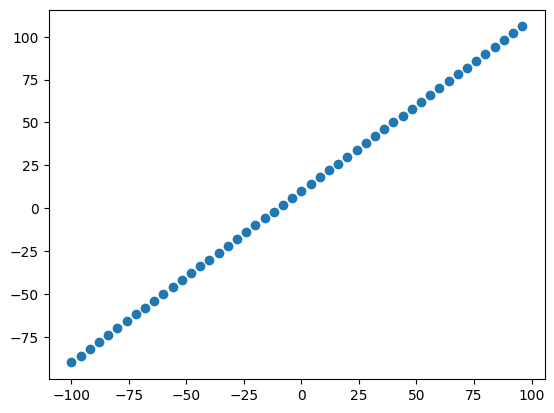

In [26]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

###The concepts of 3 sets
***Set-1: Training Set*** : Model learns from this data (70 to 80% of the total we have available). Analogy is your course material.

***Set-2 : Validation set*** : Models gets tuned on this data, which is typically 10 to 15% of data available. Analogy is practice exam

***Set-3 : Test set*** : The model gets evaluated on this data to test what has learned, this set is typically 10-15% of the total data vailable. Analogy is Final exam.

In [27]:
#Check the lenght of how many samples we have
len(X)

50

In [28]:
#Split the data into train and test sets
X_train = X[:40] #First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  #Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we have got our data in training and test sets. Lets visualize again

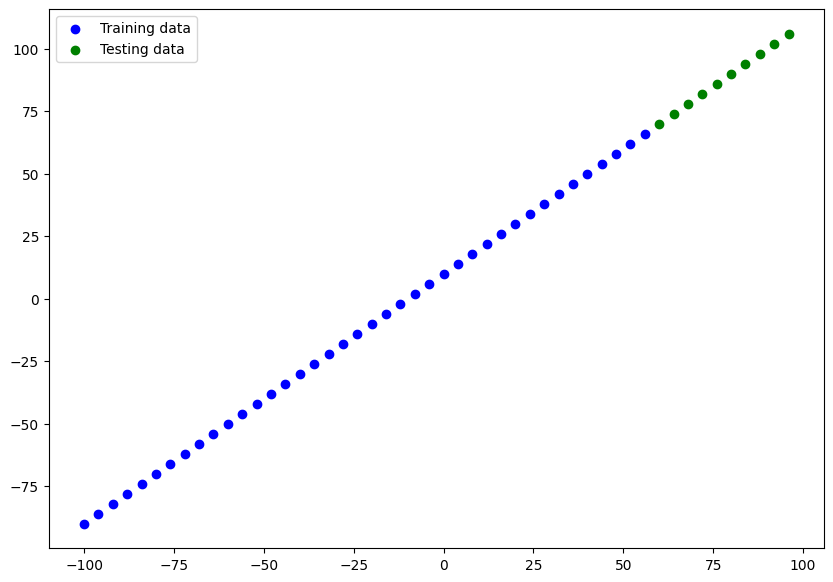

In [29]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show the legend
plt.legend()

###Lets look at how to build NN for our existing data. We did this earlier. But we will recreate again.

In [30]:
#Reshape X_train and X_test to have an added dimension for batch size
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)
#model.build(input_shape=[None, 1])


#Visualizing the model

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Shape of data that we are passing the model


In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
X.shape, y.shape

(TensorShape([50]), TensorShape([50]))

In [34]:
#Lets create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

#create the model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer1"), #Dense means fully connected layer. All neurons connected to all neurons in next layer
    tf.keras.layers.Dense(1, name="output_layer")],name="model_1") #output later with 1 unit to match the shape of y_train

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* **Total Params** - total number of
parameters in the model.
* **Trainable parameters** - These are the parameters (patterns) the model can update as it trains.
* **Non-trainable params**:  These parameters are not updated during training. This is typical when you bring in already learning parameters or patterns from other models during **transfer learning**

🔖 Resources:For more in-depth overview of trainable parameters within layer, checkout MIT's introduction to deep learning video. URL : https://introtodeeplearning.com/

In [35]:
#Lets fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
#Get summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer1 (Dense)                 │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

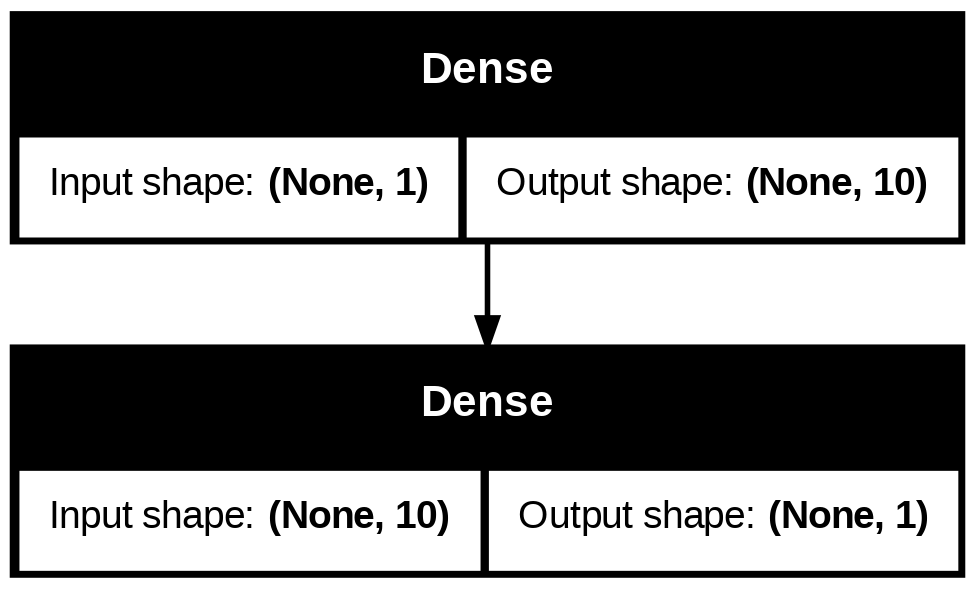

In [37]:
#Lets visualize our model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Visualizing model predictions

To visualize predictions its good idea to plot them against the ground truth labels.

Often you will see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model

In [38]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[42.687508],
       [45.423714],
       [48.159927],
       [50.89614 ],
       [53.632355],
       [56.36857 ],
       [59.104782],
       [61.840996],
       [64.57721 ],
       [67.313416]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
#Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend()

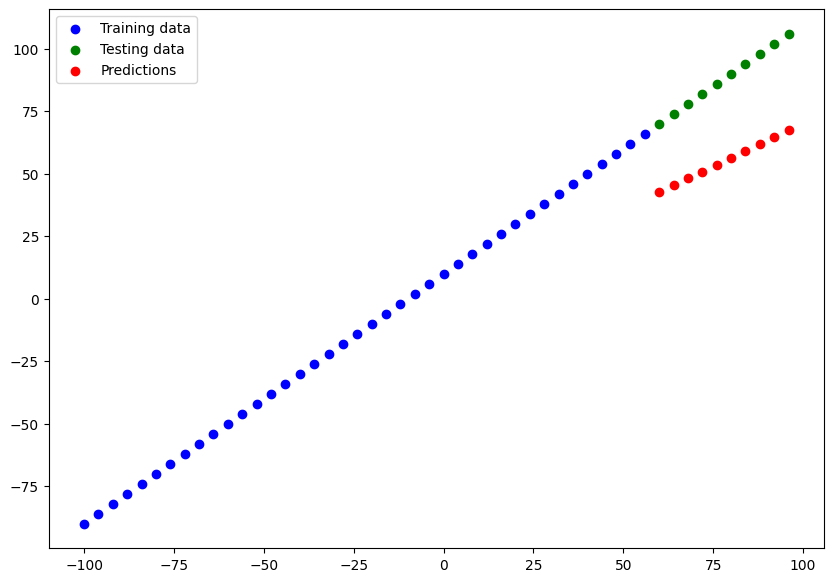

In [41]:
#Plot predictions
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaulation metrics.

Depending on the problem you are working on , there will be different evaluations metrics to evaulate your models performance.

Since we aer working on a regresison, two of the main metrics:

* MAE - Mean absolute error
* MSE - Mean square error

In [42]:
#Evaluate the model on the test set

model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 32.9995 - mae: 32.9995


[32.99953842163086, 32.99953842163086]

In [43]:
# Calculate the MSE
mae = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred)) #Squeeze y_pred to remove extra dimension

mae = tf.reduce_mean(mae) #Compute the average of all errors and store the final result in the variable 'mae'

print("Mean Squared Error:", mae.numpy()) #print the mae value


Mean Squared Error: 1102.1461


Something is wrong. The shape of tensors seems to be issue.

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.687508, 45.423714, 48.159927, 50.89614 , 53.632355, 56.36857 ,
       59.104782, 61.840996, 64.57721 , 67.313416], dtype=float32)>

In [46]:
#Calculate the mae
mae = tf.keras.losses.MeanAbsoluteError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae = tf.reduce_mean(mae)
print("Mean Absolute Error:", mae.numpy())

Mean Absolute Error: 32.99954


### Calculate the MSE

In [47]:
# Calculate the mean square error
mse = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.reduce_mean(mse)
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 1102.1461


In [48]:
#again something is wrong here
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.687508, 45.423714, 48.159927, 50.89614 , 53.632355, 56.36857 ,
       59.104782, 61.840996, 64.57721 , 67.313416], dtype=float32)>

In [50]:
#Lets recalculate mean square error
mse = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.reduce_mean(mse)
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 1102.1461


### Running experiments to improve our model
1. Get more data - get more examples for your mdoel to train on (more opportunities to learn patterns or releationships between features and labels).
2. Make your model larger (using  a more complex model) this i might come in the form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of chance to find patterns in the data.  

Lets do three modelling experiments:

1. `model_1` - Same as the original model, 1 layer , trained for 100 epochs.
2. `modle_2` -  This could be two layers trained for 100 epochs.
3. `model_3` - This could be two layers trained for 500 epochs. (500 chances to look at the data)


Build  **model_1**

In [51]:
#set random seet
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

#Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 64.7616 - mae: 64.7616 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 29.9863 - mae: 29.9863
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.4331 - mae: 9.4331
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.9707 - mae: 10.9707
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.5792 - mae: 7.5792
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.5785 - mae: 8.5785
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.0473 - mae: 10.0473
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7552 - mae: 11.7552
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6883 - mae: 8.6883
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.1570 - mae: 10.1570
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.9007 - mae: 11.9007
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.7980 - mae: 8.7980
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


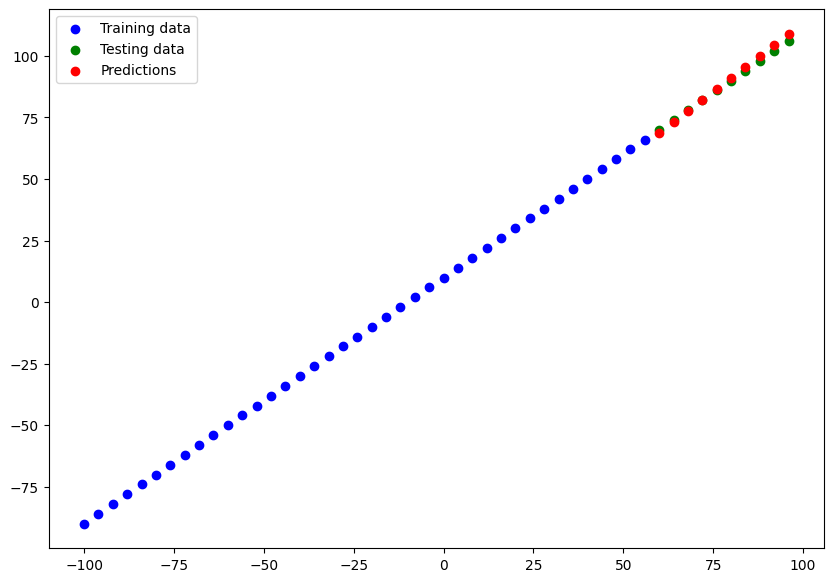

In [52]:
#Make and plot the predictions for model-1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [53]:
# Calculate model_1 evalutation metrics
mae_1 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_preds_1))
tf.constant(mae_1), tf.constant(mse_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3386939764022827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.582263946533203>)

** Build `model_2` **

* 2 dense layer trained with 100 epochs

In [64]:
#Create random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.0306 - mae: 14.0306
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 17.2650 - mae: 17.2650 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.0959 - mae: 17.0959
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.9264 - mae: 16.9264
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.7652 - mae: 16.7652
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.6605 - mae: 19.6605
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.4004 - mae: 15.4004
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.3511 - mae: 18.3511
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.9157 - mae: 13.9157
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 17.1603 - mae: 17.1603
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.9852 - mae: 16.9852
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.8181 - mae: 16.8181
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


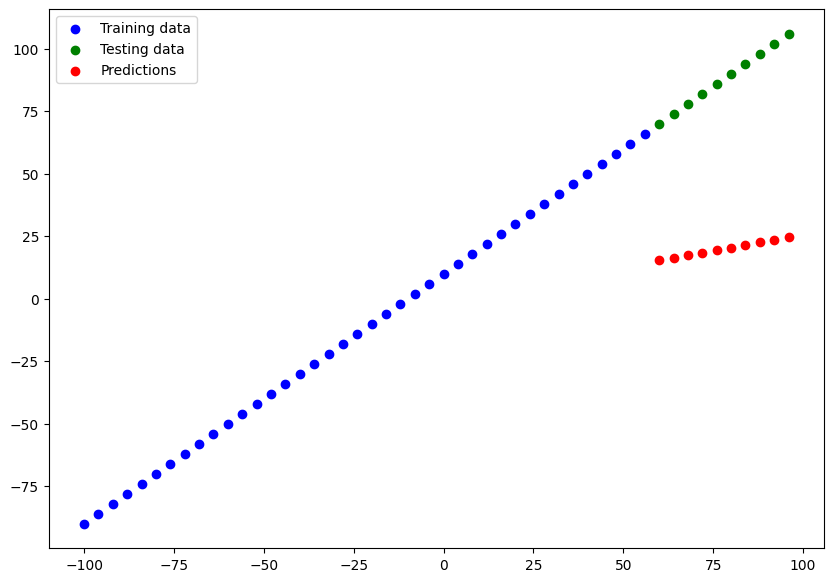

In [65]:
#Make and plot
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [67]:
# Calculate model_2 evaluation metrics
mae_2 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_pred_2))
tf.constant(mae_2), tf.constant(mse_2)

(<tf.Tensor: shape=(), dtype=float32, numpy=68.03531646728516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4701.87890625>)

** Build `model_3' **
* 2 layer for 500 epochs

In [69]:
# Set random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit the model
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 16.6239 - mae: 16.6239 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 26.1275 - mae: 26.1275
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.3903 - mae: 10.3903
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.1695 - mae: 15.1695
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 14.3344 - mae: 14.3344
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.6285 - mae: 13.6285
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17.2761 - mae: 17.2761
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.7735 - mae: 9.7735
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.8920 - mae: 10.8920
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.0261 - mae: 12.0261
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.1944 - mae: 13.1944
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 15.8625 - mae: 15.8625 
Epoch 13/500
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


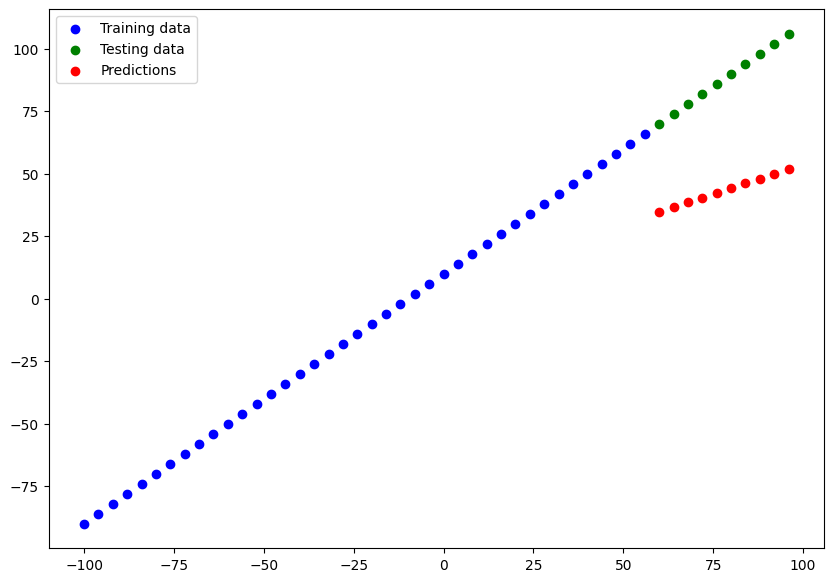

In [70]:
#make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

Looks over model is overfitting here.

In [71]:
#Model 3 evaluationmetrics
mae_3 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_pred_3))
tf.constant(mae_3), tf.constant(mse_3)

(<tf.Tensor: shape=(), dtype=float32, numpy=44.71678161621094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2036.20703125>)